In [53]:
import time
#import pydoocs
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
#import cv2
#import seaborn as sns
import struct
import pprint

In [36]:
f.close()
import tables
tables.file._open_files.close_all()


In [55]:
#f=h5py.File('PBD2_VRFD_pbd2_stream_6_run52040_file132_20240227T155455.hdf5', 'r+')
f=h5py.File('PBD2_VRFD_pbd2_stream_6_run52040_file132_20240227T155455O.hdf5', 'r')

In [56]:
print(f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TrainId'][0])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.UBC2.ARRIVAL_TIME.RELATIVE/TrainId'][0])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.UBC1.ARRIVAL_TIME.RELATIVE/TrainId'][0])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/TrainId'][0])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/TrainId'][0])
print(f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/TrainId'][0])
print(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/TrainId'][0])
print(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/TrainId'][0])
print(f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TrainId'][-1])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.UBC2.ARRIVAL_TIME.RELATIVE/TrainId'][-1])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.UBC1.ARRIVAL_TIME.RELATIVE/TrainId'][-1])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/TrainId'][-1])
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/TrainId'][-1])
print(f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/TrainId'][-1])
print(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/TrainId'][-1])
print(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/TrainId'][-1])


1942844769
1942844769
1942844769
1942844767
1942844767
1942844767
1942844767
1942844767
1942845473
1942845756
1942845756
1942845471
1942845471
1942845471
1942845471
1942845471


In [39]:
# all are on 154.3, no diffrent 

In [15]:
del f['FLASH.RF']

In [50]:
#plt.plot(f['FLASH.MAGNETS/MAGNET.ML/D4FL2XTDS/CURRENT.SP/Value'][:], 'o')

In [18]:
#all sam number 
del f['FLASH.MAGNETS']

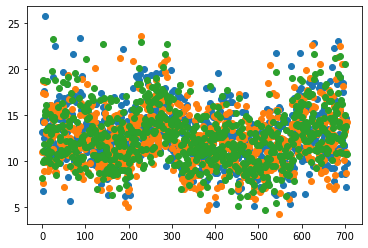

In [51]:
plt.plot(f['FLASH.FEL/XGM.INTENSITY/FL2.TUNNEL/INTENSITY.TD'][:,:], 'o')


In [32]:
LL=np.nonzero(f['FLASH.DIAG/BPM/9FL2XTDS/X.TD'][2,:])
print(LL)
print(LL[0][0])
Id=LL[0][0]


(array([480, 481, 482]),)
480


In [33]:
CHARGE_TD=f['FLASH.DIAG/BPM/9FL2XTDS/CHARGE.TD'][:,Id]
TrainId_TD=f['FLASH.DIAG/BPM/9FL2XTDS/TrainId'][:]
x_TD=f['FLASH.DIAG/BPM/9FL2XTDS/X.TD'][:,Id]
y_TD=f['FLASH.DIAG/BPM/9FL2XTDS/Y.TD'][:,Id]

In [38]:
del f['FLASH.DIAG/BPM/9FL2XTDS/CHARGE.TD']
#dset = f.create_dataset('FLASH.DIAG/BPM/9FL2XTDS/CHARGE.TD', data=CHARGE_TD)
# it is wronge 
del f['FLASH.DIAG/BPM/9FL2XTDS/X.TD']
dset = f.create_dataset('FLASH.DIAG/BPM/9FL2XTDS/X.TD', data=x_TD)

del f['FLASH.DIAG/BPM/9FL2XTDS/Y.TD']
dset = f.create_dataset('FLASH.DIAG/BPM/9FL2XTDS/Y.TD', data=y_TD)
# we complet the BPM grpu here 
del f['FLASH.DIAG/BPM/9FL2XTDS/BUNCH_VALID.TD']
del f['FLASH.DIAG/BPM/9FL2XTDS/TimeStamp']

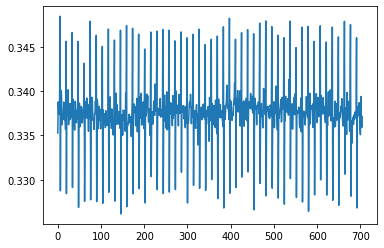

In [39]:
plt.plot(CHARGE_TD)

In [40]:
print(f['FLASH.DIAG/BPM/9FL2XTDS'].keys())

KeysView(<HDF5 group "/FLASH.DIAG/BPM/9FL2XTDS" (3 members)>)


In [ ]:
del f['FLASH.DIAG/TOROID/7FL2XTDS/TimeStamp']

In [41]:
charge_7FL2XTDS=f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD'][:,480]
del f['FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD']
dset = f.create_dataset('FLASH.DIAG/TOROID/7FL2XTDS/CHARGE.TD', data=charge_7FL2XTDS)


In [42]:
del f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TimeStamp']

In [44]:
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/TimeStamp']

In [45]:
LL=np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD'][0,:])
print(LL[0][-3])
Id=LL[0][-3]

1467


In [46]:

#Id=1467
DBCM11_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.normalized.TD', data=DBCM11_normalized)

DBCM12_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.normalized.TD', data=DBCM12_normalized)

DBCM21_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.normalized.TD', data=DBCM21_normalized)

DBCM22_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.normalized.TD', data=DBCM22_normalized)

DBCM51_normalized=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD', data=DBCM51_normalized)

DBCM52_normalized=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD', data=DBCM52_normalized)



In [47]:
#Id=1467
DBCM11=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.TD', data=DBCM11)

DBCM12=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.TD', data=DBCM12)

DBCM21=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.TD', data=DBCM21)

DBCM22=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.TD', data=DBCM22)

DBCM51=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD', data=DBCM51)

DBCM52=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.TD', data=DBCM52)

In [48]:
LL=np.nonzero(f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][0,:])
#plt.plot(f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][9,:])
print(LL)

(array([4320, 4329, 4338]),)


In [49]:
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/TimeStamp']
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/TimeStamp']
del f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/TimeStamp']


In [50]:
BAM_DBC1=f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value'][:,Id];
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value']
dset = f.create_dataset('FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value', data=BAM_DBC1)

BAM_DBC2=f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/Value'][:,Id];
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/Value']
dset = f.create_dataset('FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/Value', data=BAM_DBC2)

BAM_DBC5=f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][:,Id];
del f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value']
dset = f.create_dataset('FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value', data=BAM_DBC5)


In [52]:
f.close()
import tables
tables.file._open_files.close_all()